# Deleting a mesh

This tutorial will demonstrate mesh deletion in spherical coordinates. At the very beginning, the necessary libraries have to be imported.

In [1]:
import meshkernel
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import datetime as dt

## Deleting a simple mesh

Create a rectangular grid

In [2]:
lon_min, lon_max = -2.5, -1.3
lat_min, lat_max = 48.4, 49.0
lon_res, lat_res = 0.01, 0.01

make_grid_parameters = meshkernel.MakeGridParameters()
make_grid_parameters.origin_x = lon_min
make_grid_parameters.origin_y = lat_min
make_grid_parameters.upper_right_x = lon_max
make_grid_parameters.upper_right_y = lat_max
make_grid_parameters.block_size_x = lon_res
make_grid_parameters.block_size_y = lat_res

mk2 = meshkernel.MeshKernel(projection=meshkernel.ProjectionType.SPHERICAL)
mk2.get_projection()

mk2.curvilinear_compute_rectangular_grid_on_extension(make_grid_parameters)
mk2.curvilinear_convert_to_mesh2d()
mesh2d_orig = mk2.mesh2d_get()

Create a polygon to be used for deletion

In [3]:
pol_x = np.array(
    [
        -2.554972,
        -2.475056,
        -2.488361,
        -2.4375,
        -2.418417,
        -2.319139,
        -2.313333,
        -2.28625,
        -2.336694,
        -2.314167,
        -2.246722,
        -2.213361,
        -2.195028,
        -2.182472,
        -2.157944,
        -2.175444,
        -2.152528,
        -2.125889,
        -2.152528,
        -2.04925,
        -2.057944,
        -2.032111,
        -2.034639,
        -1.997083,
        -2.015472,
        -1.975028,
        -1.962972,
        -1.989667,
        -1.957139,
        -2.015056,
        -2.004583,
        -2.033,
        -1.98925,
        -1.992556,
        -1.941667,
        -1.962972,
        -1.935056,
        -1.905028,
        -1.843389,
        -1.837111,
        -1.872111,
        -1.842528,
        -1.771667,
        -1.635028,
        -1.592528,
        -1.511722,
        -1.51,
        -1.470056,
        -1.43,
        -1.3575,
        -1.412889,
        -1.389222,
        -1.447583,
        -1.453361,
        -1.505028,
        -1.530056,
        -1.570444,
        -1.576278,
        -1.615444,
        -1.580417,
        -1.2,
        -1.2,
        -2.6,
        -2.554972,
    ]
)

pol_y = np.array(
    [
        48.599583,
        48.622889,
        48.64625,
        48.653722,
        48.634556,
        48.690389,
        48.672083,
        48.667444,
        48.620389,
        48.612111,
        48.645444,
        48.57375,
        48.611222,
        48.577889,
        48.587472,
        48.597472,
        48.618722,
        48.604528,
        48.633694,
        48.639583,
        48.625833,
        48.624972,
        48.604944,
        48.578306,
        48.571667,
        48.536222,
        48.549944,
        48.583333,
        48.578306,
        48.598722,
        48.614111,
        48.650806,
        48.668722,
        48.684583,
        48.684583,
        48.689972,
        48.702917,
        48.690417,
        48.712083,
        48.679972,
        48.645806,
        48.616222,
        48.603722,
        48.617889,
        48.639611,
        48.621222,
        48.632056,
        48.625417,
        48.643722,
        48.63375,
        48.659139,
        48.67625,
        48.655389,
        48.672083,
        48.687056,
        48.73125,
        48.744167,
        48.821639,
        48.835806,
        48.856639,
        48.9,
        48.3,
        48.3,
        48.599583,
    ]
)

Perform mesh deletion. It might take a minute due to the grid size

In [4]:
delete_pol_geom = meshkernel.GeometryList(x_coordinates=pol_x, y_coordinates=pol_y)
print("Deleting grid with coastlines: ", end="")
dtstart = dt.datetime.now()
mk2.mesh2d_delete(
    geometry_list=delete_pol_geom,
    delete_option=meshkernel.DeleteMeshOption.INSIDE_NOT_INTERSECTED,
    invert_deletion=False,
)
print(f"{(dt.datetime.now()-dtstart).total_seconds():.2f} sec")

Deleting grid with coastlines: 0.02 sec


Plot the deletion result

(48.29, 49.0)

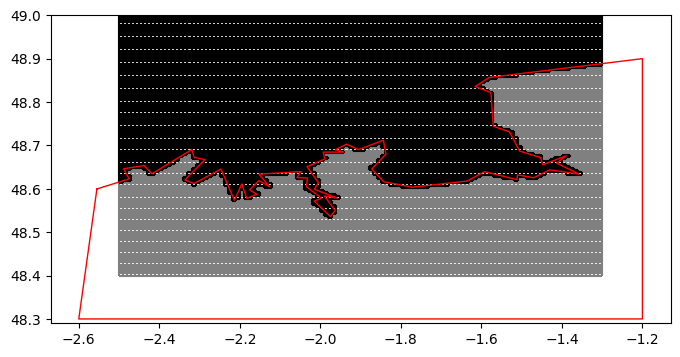

In [5]:
plt.close("all")
figsize = (8, 4)
mesh2d = mk2.mesh2d_get()
fig, ax = plt.subplots(figsize=figsize)
mesh2d_orig.plot_edges(ax, color="grey")
mesh2d.plot_edges(ax, color="k")
ax.plot(pol_x, pol_y, "r", linewidth=1)
ax.set_ylim(lat_min - 0.11, lat_max)

## Deleting a mesh using a global polygon

Create a rectangular grid

In [6]:
lon_min, lon_max = -6, 2
lat_min, lat_max = 48.5, 51.2
lon_res, lat_res = 0.2, 0.2

make_grid_parameters = meshkernel.MakeGridParameters()
make_grid_parameters.origin_x = lon_min
make_grid_parameters.origin_y = lat_min
make_grid_parameters.upper_right_x = lon_max
make_grid_parameters.upper_right_y = lat_max
make_grid_parameters.block_size_x = lon_res
make_grid_parameters.block_size_y = lat_res

mk = meshkernel.MeshKernel(projection=meshkernel.ProjectionType.SPHERICAL)
mk.curvilinear_compute_rectangular_grid_on_extension(make_grid_parameters)
mk.curvilinear_convert_to_mesh2d()
mesh2d = mk.mesh2d_get()
mesh2d_orig = mk.mesh2d_get()

num_faces_before = len(mesh2d.face_x)
num_columns = int((lat_max - lat_min) / 0.2)
num_rows = int((lon_max - lon_min) / 0.2)

print("num_faces_before ", num_faces_before)
print("num_columns ", num_columns)
print("num_rows ", num_rows)

num_faces_before  1120
num_columns  13
num_rows  40


Import global coastlines (about 130 000 segments)

In [7]:
polygon_file_path = Path().absolute() / "data_examples" / "global_coastline.pol"
polygon_np = np.loadtxt(polygon_file_path, comments="*", skiprows=2, dtype=np.double)
pol_x = np.array(polygon_np[:, 0], dtype=np.double)
pol_y = np.array(polygon_np[:, 1], dtype=np.double)

In [8]:
print(">> deleting grid with coastlines: ", end="")
dtstart = dt.datetime.now()
delete_pol_geom = meshkernel.GeometryList(x_coordinates=pol_x, y_coordinates=pol_y)
mk.mesh2d_delete(
    geometry_list=delete_pol_geom,
    delete_option=meshkernel.DeleteMeshOption.INSIDE_NOT_INTERSECTED,
    invert_deletion=False,
)
print(f"{(dt.datetime.now()-dtstart).total_seconds():.2f} sec")

>> deleting grid with coastlines: 1.36 sec


num_faces_after  1120
deleted faces  213


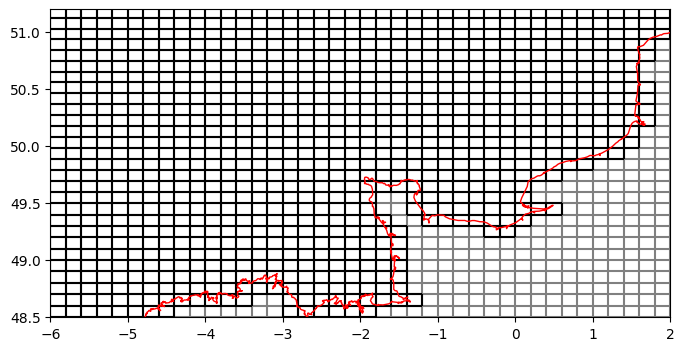

In [9]:
plt.close("all")
figsize = (8, 4)
mesh2d = mk.mesh2d_get()
fig, ax = plt.subplots(figsize=figsize)
mesh2d_orig.plot_edges(ax, color="grey")
mesh2d.plot_edges(ax, color="k")
ax.plot(pol_x, pol_y, "r", linewidth=1)
ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)
num_faces_after = len(mesh2d.face_x)
print("num_faces_after ", num_faces_before)
print("deleted faces ", num_faces_before - num_faces_after)